In [1]:
import numpy
import math
from matplotlib import pyplot

%matplotlib inline

In [2]:
N = 100                               
x_start, x_end = -1.0, 1.0            
y_start, y_end = -1.5, 1.5           
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)              

In [3]:
u_inf = 1.0
psi_freestream = u_inf * Y


u_freestream = u_inf*numpy.ones_like(X)
v_freestream = numpy.zeros_like(X)
u_freestream

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
class Source:
    def __init__(self, strength, x, y):
        self.strength = strength
        self.x, self.y = x, y
    def velocity(self, X, Y):
        self.u = (self.strength / (2 * math.pi) *
                  (X - self.x) / ((X - self.x)**2 + (Y - self.y)**2))
        self.v = (self.strength / (2 * math.pi) *
                  (Y - self.y) / ((X - self.x)**2 + (Y - self.y)**2))
    def stream_function(self, X, Y):
        self.psi = (self.strength / (2 * math.pi) *
                    numpy.arctan((Y - self.y)/(X - self.x)))

In [9]:
N_sources = 11
strength = 5.0
strength_source = strength / N_sources
x_source = numpy.zeros(N_sources, dtype=float)
y_source = numpy.linspace(-1.0,1.0, N_sources)

sources = numpy.empty(N_sources, dtype=object)
for i in range(N_sources):
    sources[i] = Source(strength_source, x_source[i], y_source[i])
    sources[i].velocity(X, Y)
    sources[i].stream_function(X,Y)

u = u_freestream.copy()
v = v_freestream.copy()
psi = psi_freestream.copy()
for source in sources:
    u = u + source.u
    v = v + source.v
    psi = psi + source.psi

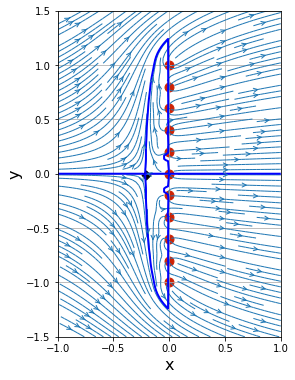

In [10]:
width = 4
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)
pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);
pyplot.contour(X, Y, psi,
              levels=[0], colors='b', linewidths=2, linestyles='solid')

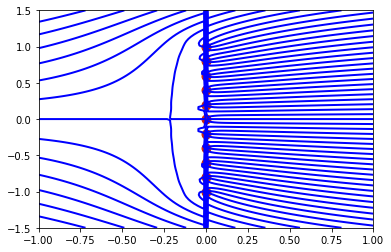

In [12]:
pyplot.contour(X, Y, psi,
              levels=numpy.linspace(numpy.min(psi), numpy.max(psi), 51), colors='b', linewidths=2, linestyles='solid')

#pyplot.scatter(x[i_stagn], y[j_stagn],
#               color='black', s=40, marker='D')
pyplot.scatter(x_source, y_source,
               color='#CD2305', s=80, marker='o')

In [13]:
from scipy import integrate

sigma = 2.5
y_min, y_max = -1.0, 1.0
integrand_u = lambda s, x, y: x / (x**2 + (y - s)**2)
integrand_v = lambda s, x, y: (y - s) / (x**2 + (y - s)**2)

def integration(x, y, integrand):
    return integrate.quad(integrand, y_min, y_max, args=(x, y))[0]

vec_integration = numpy.vectorize(integration)

u_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_u)
v_sheet = sigma / (2.0 * numpy.pi) * vec_integration(X, Y, integrand_v)

u = u_freestream + u_sheet
v = v_freestream + v_sheet


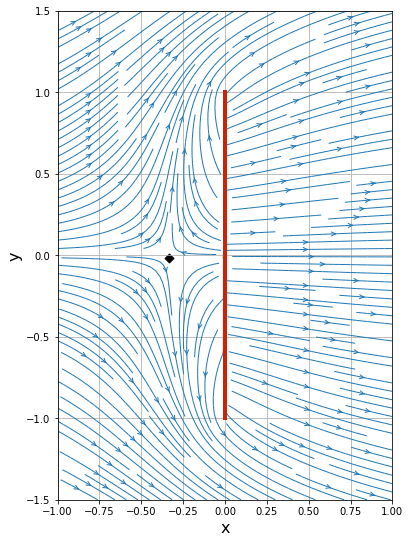

In [15]:

width = 6
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

pyplot.axvline(0.0,
               (y_min - y_start) / (y_end - y_start),
               (y_max - y_start) / (y_end - y_start),
               color='#CD2305', linewidth=4)

magnitude = numpy.sqrt(u**2 + v**2)
j_stagn, i_stagn = numpy.unravel_index(magnitude.argmin(), magnitude.shape)

pyplot.scatter(x[i_stagn], y[j_stagn],
               color='black', s=40, marker='D')
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end);